<a href="https://colab.research.google.com/github/HayeonKimm/machine-Learning/blob/master/machine_how/DeepLearning/%EB%94%A5%EB%9F%AC%EB%8B%9D(%ED%95%A9%EC%84%B1%EA%B3%B1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망을 사용한 이미지 분류

### 패션 mnist

In [8]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1)/255.0 # 채널 차원수 추가
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same',input_shape=(28,28,1))) # 32개의 필터를 사용하고 커널의 크기는 3,3이다.
model.add(keras.layers.MaxPool2D(2)) # 패션 mnist 이미지가 (28,28) 크기에 세임 패딩을 적용했기 때문에 합성곱 층에서 출력된 특성 맵의 가로세로 크기는 입력과 동일하다. 이후 2 풀링을 사용했으므로 특성맵의 크기는 절반으로
# 줄어든다.합성곱 층에서 32개의 필터를 사용했기 때문에 이 특성의 맵이 깊이는 32가 된다. 따라서 최대 풀리을 통과한 특성 맵의 크기는 (14,14,32) 가 될 것이다.

In [10]:
model.add(keras.layers.Conv2D(64,kernel_size=3, activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

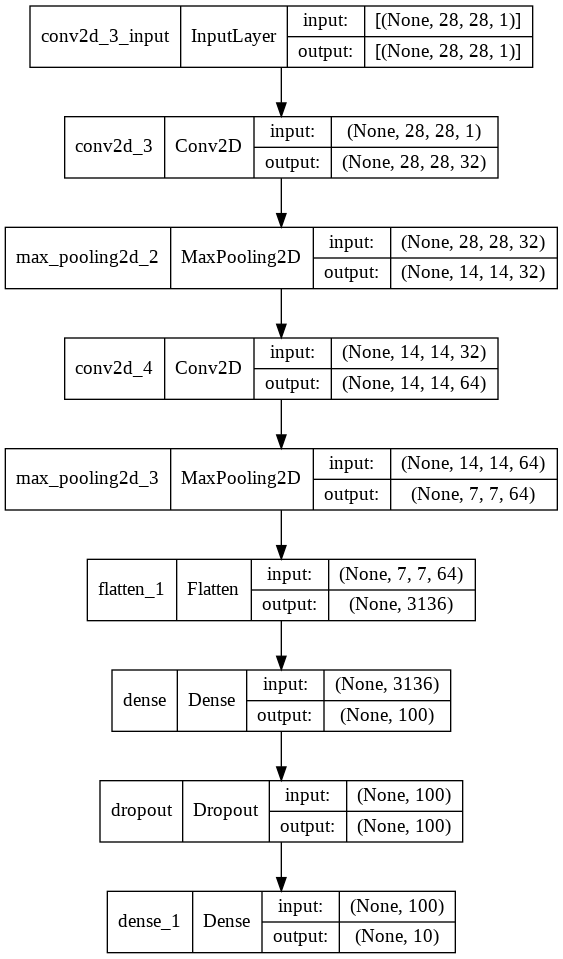

In [13]:
# 시각화
keras.utils.plot_model(model,show_shapes=True)

In [15]:
# 모델 컴파일과 훈련

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('beeset_cnn-model.h5',save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=5, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/5
1500/1500 [==============================] - 82s 54ms/step - loss: 0.3404 - accuracy: 0.8778 - val_loss: 0.2718 - val_accuracy: 0.8999
Epoch 2/5
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2891 - accuracy: 0.8951 - val_loss: 0.2524 - val_accuracy: 0.9069
Epoch 3/5
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2531 - accuracy: 0.9074 - val_loss: 0.2346 - val_accuracy: 0.9135
Epoch 4/5
1500/1500 [==============================] - 53s 36ms/step - loss: 0.2315 - accuracy: 0.9154 - val_loss: 0.2290 - val_accuracy: 0.9153
Epoch 5/5
1500/1500 [==============================] - 55s 36ms/step - loss: 0.2129 - accuracy: 0.9220 - val_loss: 0.2318 - val_accuracy: 0.9155


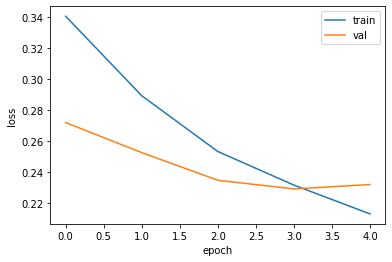

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [18]:
model.evaluate(val_scaled,val_target) # 평가

375/375 [==============================] - 4s 11ms/step - loss: 0.2318 - accuracy: 0.9155


[0.23182539641857147, 0.9154999852180481]